# Dynamic plots


 1. Animmated plots
 2. pendulum plots, single pendulum, 
 3. double pendulum, 
 4. perhaps try a spherical pendulum?
 5. triple pendulum? 

# Topic 1 - Animated plots.

## a simple progress indicator

Say you have a lengthy computation and want to illustrate the progress made, so you don't get too impatient.  For example, the Newton basins of attraction plot.  We will use the [**tqdm**](https://pypi.python.org/pypi/tqdm) library for this.

In [2]:
import tqdm
import time as ti ## lets us have delays

for i in tqdm.tqdm(range(12)):
    ti.sleep(0.5)

100%|██████████| 12/12 [00:06<00:00,  1.99it/s]


In [3]:
## GUI version -- needs widgets
for i in tqdm.tqdm_notebook(range(12)):
    ti.sleep(0.5)

HBox(children=(IntProgress(value=0, max=12), HTML(value='')))

# Animated (non-static) matplotlib plots

Some basic ways of making animated plots in matplotlib:

1. Using input fields, such as sliders and buttons. 
2. Continuously varying the output, such as having time dependence.


<IPython.core.display.Javascript object>


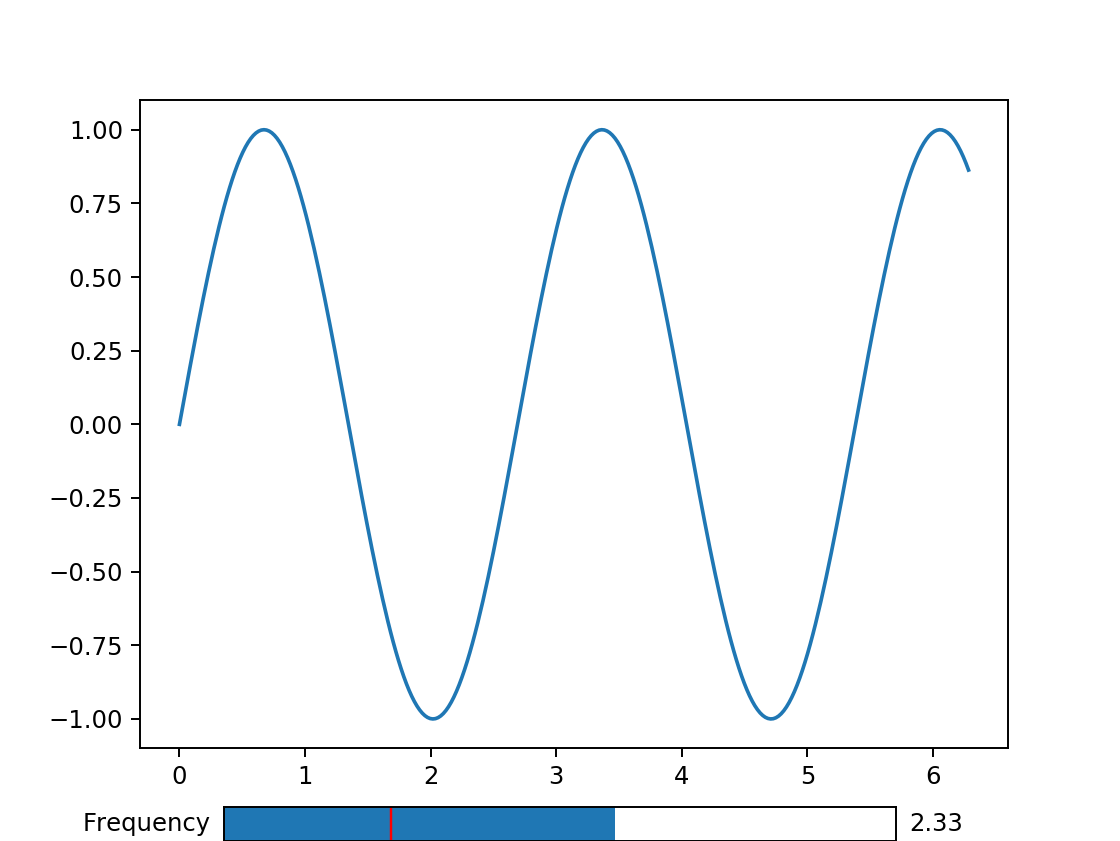

In [16]:
%matplotlib nbagg  
##matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.widgets import Slider

I = np.linspace(0, 2*np.pi, 300)
fig,ax = plt.subplots()

k = 1.0
l, = plt.plot(I, np.sin(k*I))

## let's make that interactive with a slider
## first say location
axfreq = plt.axes([0.2, 0.0, 0.6, 0.04])
kfreq = Slider(axfreq, 'Frequency', 0.01, 4.0, valinit=k)

def update(val):
    k = kfreq.val
    l.set_ydata(np.sin(k*I))
    fig.canvas.draw_idle()

kfreq.on_changed(update) ## when the slider changes, what to do.
plt.show()


<IPython.core.display.Javascript object>


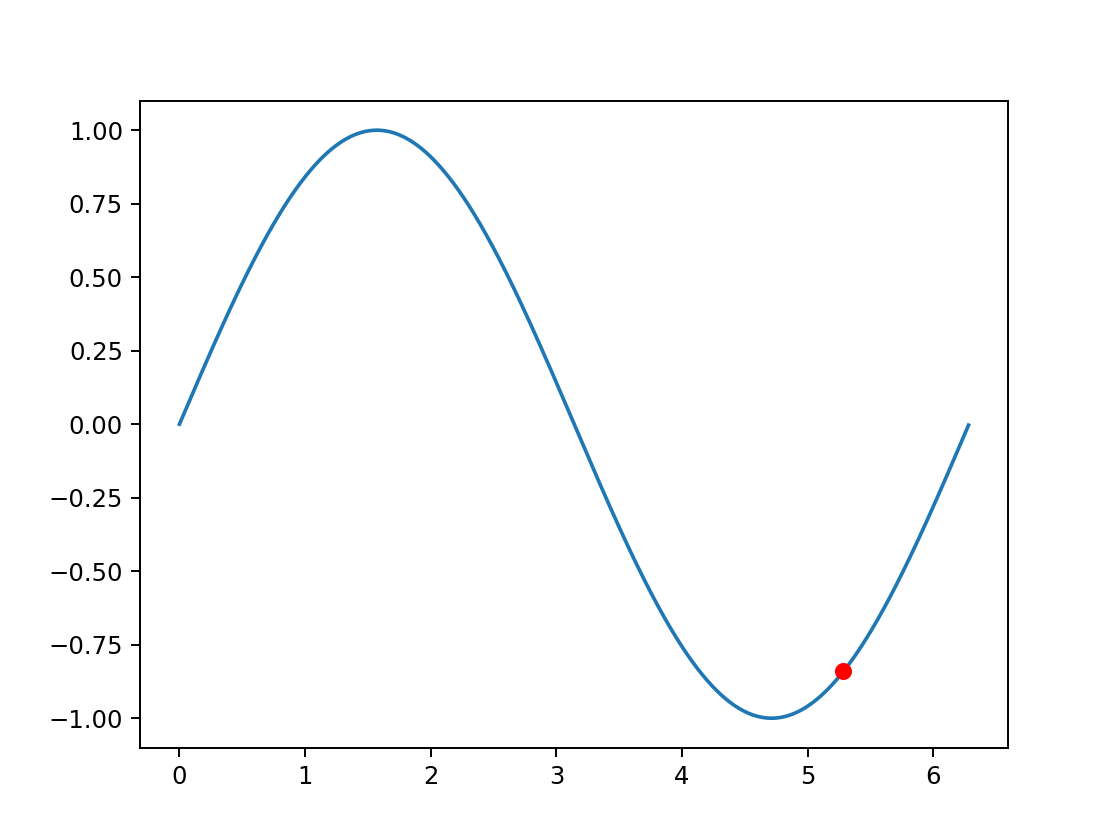

In [22]:
## let's try a time-varying plot
## plot sin function, and have a "cursor" that traces over the plot

import matplotlib.animation as animation
fig, ax = plt.subplots()
x = np.arange(0, 2*np.pi, 0.01)
ax.plot(x, np.sin(x))

## set up the cursor -- red dot that traces out the sin curve
t = np.array([0.0])
pt, = ax.plot(t, np.sin(t), 'ro')

def init():
    pt.set_xdata(t)
    pt.set_ydata(np.sin(t))
    return pt, 

def animate(i):
    nx = np.array([2*np.pi*i/1000])
    pt.set_xdata(nx)
    pt.set_ydata(np.sin(nx))
    return pt, 

## interval is ms delay between frames
ani = animation.FuncAnimation( fig, animate, init_func=init, interval=1,\
                             frames = 1000, blit=True )

plt.show()

# Pendulum plots

We make a few interactive plots related to the dynamics of pendulums.  Let's start with the single-arm pendulum with friction.  This is described by the ODE:

$$ \theta'' + a\theta' + b \sin \theta = 0$$

provided $a \geq 0$ and $b >0$. $a$ can be thought of roughly as the friction at the bearing, with $b$ roughly the mass of the arm. 

A picture of such a pendulum, including a sketch of how to work out the constants $a$ and $b$ precisely appears below.

<img src="pendulum.png" alt="Single pendulum example" width=400 height=400>

We convert the pendulum ODE into a first-order ODE.

$$ \pmatrix{\theta \cr \theta'}' = \pmatrix{\theta' \cr -a \theta' - b \sin \theta}$$

which we will simulate (numerically) via the **scipy.integrate** **odeint** command.

We will put this all together into a simulation that plots the pairs $(\theta, \theta')$ over a time interval, using sliders to specify the initial conditions $(\theta_0, \theta'_0, a, b, \Delta t)$. 

<IPython.core.display.Javascript object>


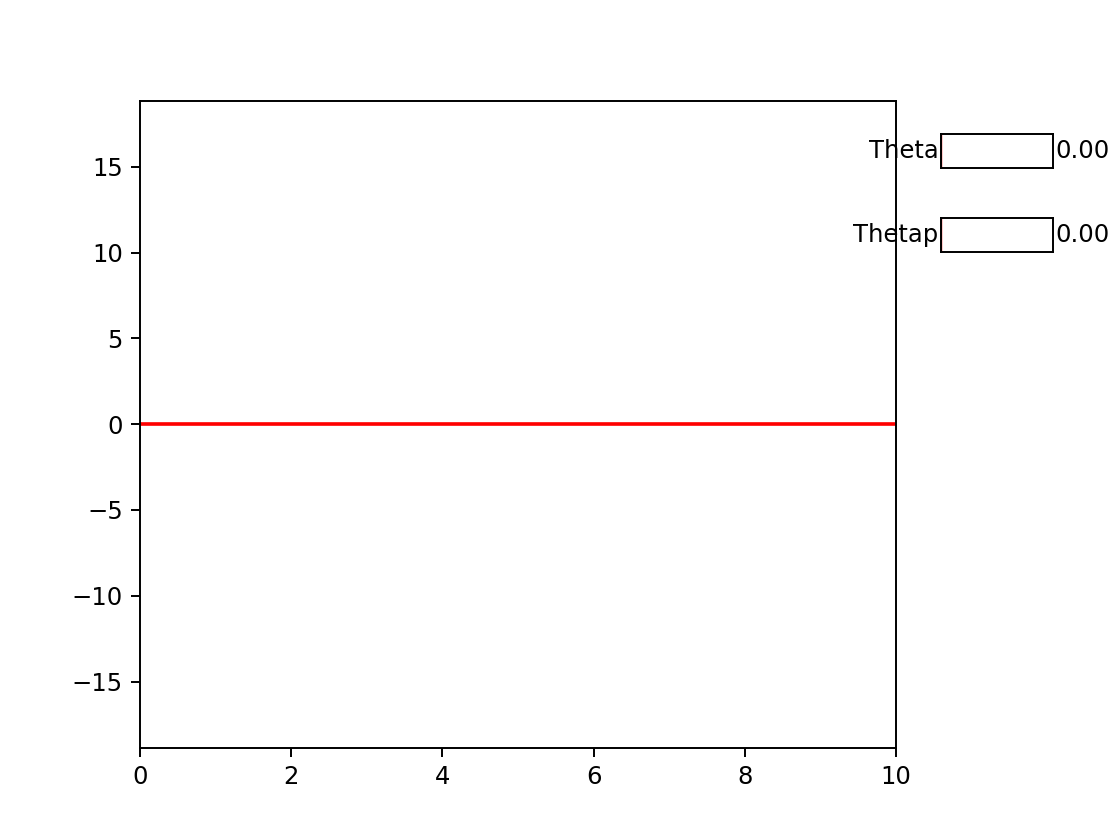

In [38]:
from scipy.integrate import odeint

## let's do an illustration of the solutions, we will have various sliders controlling the 
## initial conditions, a, and b.  For these four sliders, we plot the solution for some time.

fig,ax = plt.subplots()
plt.subplots_adjust(right=0.8)

## variables theta and theta' th and tp.
## theta vs time?  or we could plot theta vs theta'

th = [0.0]
tp = [0.0]
t = [0.0]

T = 10
l, = plt.plot(t, th, 'r')
ax.set_xlim(left=0.0, right=T)
ax.set_ylim(bottom=-6*np.pi, top=6*np.pi)

## let's make that interactive with a slider
## first say location
axth = plt.axes([0.84, 0.8, 0.1, 0.04])
thval = Slider(axth, 'Theta', 0.00, 2*np.pi, valinit=th[0])

axtp = plt.axes([0.84, 0.7, 0.1, 0.04])
tpval = Slider(axtp, 'Thetap', 0.0, 60.0, valinit=tp[0])

a=0.1
b=10

def update(val):
    th = [thval.val]
    tp = [tpval.val]
    ## simulate solution, put into th and tp and t.
    t = np.linspace(0.0, T, 1000)
    SOL = odeint(lambda th, t, a, b: [th[1], -a*th[1]-b*np.sin(th[0])], [th[0], tp[0]], \
                t, args=(a,b))
    th = [x[0] for x in SOL]
    tp = [x[1] for x in SOL]
    
    ## update screen
    l.set_xdata(t)
    l.set_ydata(th)
    fig.canvas.draw_idle()

thval.on_changed(update) ## when the slider changes, what to do.
tpval.on_changed(update)

plt.show()


<IPython.core.display.Javascript object>


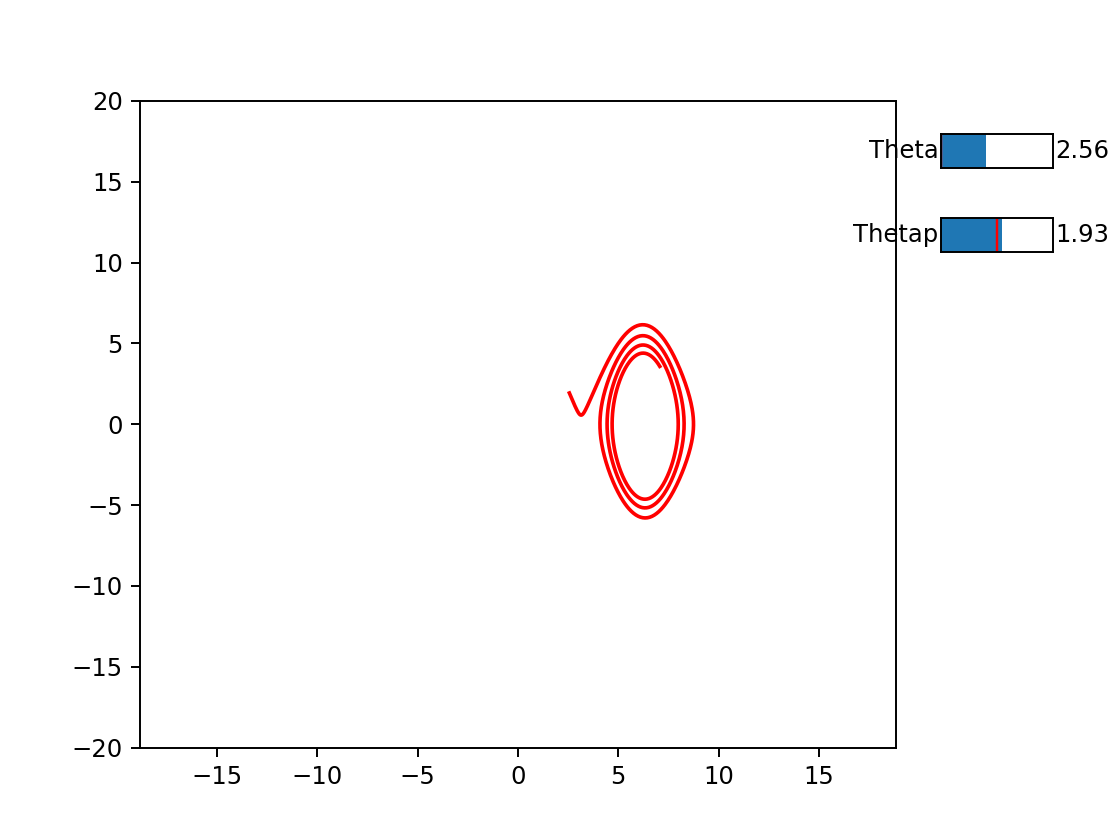

In [39]:
## theta vs. theta' 

fig,ax = plt.subplots()
plt.subplots_adjust(right=0.8)

## variables theta and theta' th and tp.
## theta vs time?  or we could plot theta vs theta'

th = [0.0]
tp = [0.0]
t = [0.0]

T = 10
l, = plt.plot(th, tp, 'r')
ax.set_xlim(left=-6*np.pi, right=6*np.pi)
ax.set_ylim(bottom=-20, top=20)

## let's make that interactive with a slider
## first say location
axth = plt.axes([0.84, 0.8, 0.1, 0.04])
thval = Slider(axth, 'Theta', 0.00, 2*np.pi, valinit=th[0])

axtp = plt.axes([0.84, 0.7, 0.1, 0.04])
tpval = Slider(axtp, 'Thetap', -20.0, 20.0, valinit=tp[0])

a=0.1
b=10

def update(val):
    th = [thval.val]
    tp = [tpval.val]
    ## simulate solution, put into th and tp and t.
    t = np.linspace(0.0, T, 1000)
    SOL = odeint(lambda th, t, a, b: [th[1], -a*th[1]-b*np.sin(th[0])], [th[0], tp[0]], \
                t, args=(a,b))
    th = [x[0] for x in SOL]
    tp = [x[1] for x in SOL]
    
    ## update screen
    l.set_xdata(th)
    l.set_ydata(tp)
    fig.canvas.draw_idle()

thval.on_changed(update) ## when the slider changes, what to do.
tpval.on_changed(update)

plt.show()


In [ ]:
## let's now do an animated plot, to "see" the pendulum in action

fig, ax = plt.subplots()

## initial plot. bearing, initial arm, circle of radius 1.

circ = plt.Circle( (0.0, 0.0), 1.0, color='y', fill=False)
cent = plt.plot([0.0], [0.0], 'ro')
ax.add_artist(circ)
ax.set_xlim(-1.05, 1.05)
ax.set_ylim(-1.05, 1.05)

## set up arm
TH = [0.0]
TP = [14.0]

arm, = plt.plot([0.0, np.sin(TH[-1])], [0.0, -np.cos(TH[-1])], 'b')

dt = 0.002

def init():
    arm.set_xdata( [0.0, np.sin(TH[-1])] )
    arm.set_ydata( [0.0, -np.cos(TH[-1])] )
    return arm, 

def animate(i):
    ## asking the ODE code to do just one step
    SOL = odeint(lambda th, t, a, b: [th[1], -a*th[1]-b*np.sin(th[0])], [TH[-1], TP[-1]], \
                [0.0, dt], args=(a,b))
    TH.append(SOL[-1][0])
    TP.append(SOL[-1][1])
    arm.set_xdata( [0.0, np.sin(TH[-1])] )
    arm.set_ydata( [0.0, -np.cos(TH[-1])] )
    return arm,
    
## interval is ms delay between frames
ani = animation.FuncAnimation( fig, animate, init_func=init, interval=1,\
                               blit=True )

plt.show()

<IPython.core.display.Javascript object>


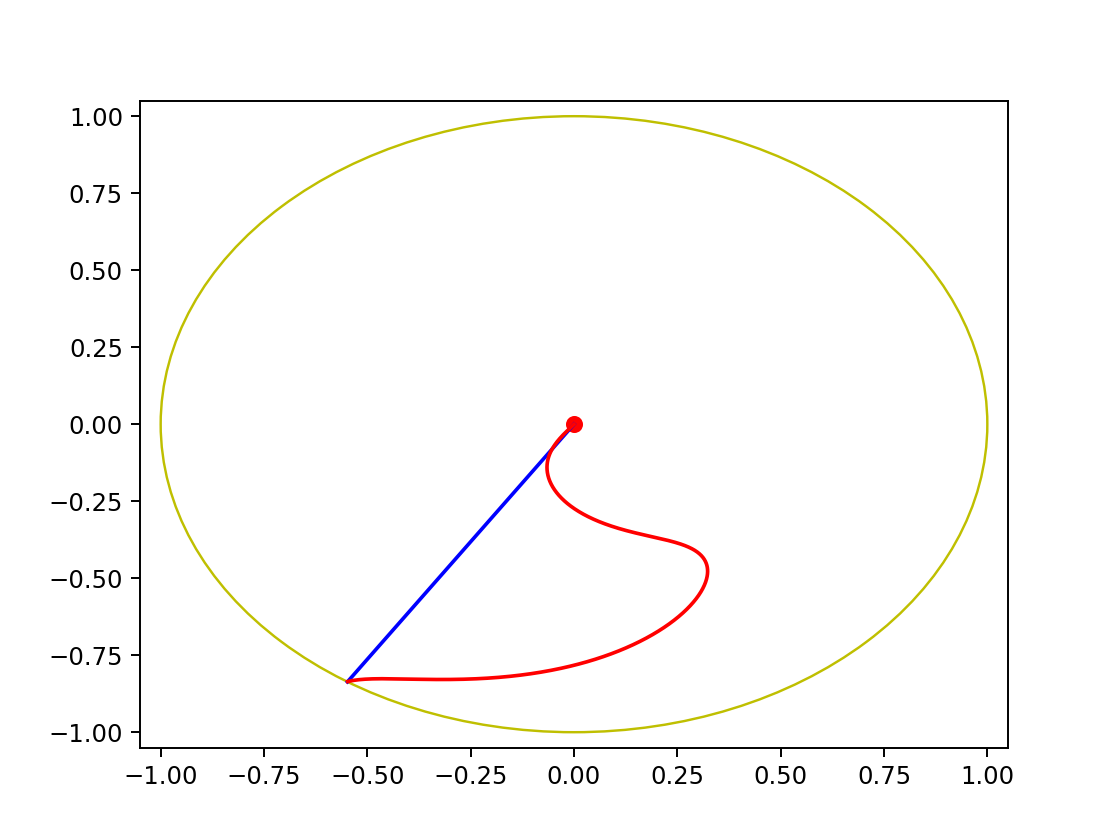

In [45]:
## duplicate previous code but let's include a "trace" or "shadow" of the previous
## theta values 
fig, ax = plt.subplots()

## initial plot. bearing, initial arm, circle of radius 1.

circ = plt.Circle( (0.0, 0.0), 1.0, color='y', fill=False)
cent = plt.plot([0.0], [0.0], 'ro')
ax.add_artist(circ)
ax.set_xlim(-1.05, 1.05)
ax.set_ylim(-1.05, 1.05)

## set up arm
TH = [0.0]
TP = [14.0]

arm, = plt.plot([0.0, np.sin(TH[-1])], [0.0, -np.cos(TH[-1])], 'b')
tr, = plt.plot([np.sin(TH[-1])], [-np.cos(TH[-1])], 'r-')

dt = 0.002
Tl = 1000 ## number of previous points to plot

def init():
    arm.set_xdata( [0.0, np.sin(TH[-1])] )
    arm.set_ydata( [0.0, -np.cos(TH[-1])] )
    return arm, 

def animate(i):
    ## asking the ODE code to do just one step
    SOL = odeint(lambda th, t, a, b: [th[1], -a*th[1]-b*np.sin(th[0])], [TH[-1], TP[-1]], \
                [0.0, dt], args=(a,b))
    TH.append(SOL[-1][0])
    TP.append(SOL[-1][1])
    arm.set_xdata( [0.0, np.sin(TH[-1])] )
    arm.set_ydata( [0.0, -np.cos(TH[-1])] )
    recth = TH[-Tl:]
    tr.set_xdata([(i/Tl)*np.sin(recth[i]) for i in range(len(recth))])
    tr.set_ydata([-(i/Tl)*np.cos(recth[i]) for i in range(len(recth))])

    return arm, tr, 
    
## interval is ms delay between frames
ani = animation.FuncAnimation( fig, animate, init_func=init, interval=1,\
                               blit=True )

plt.show()

## Double pendulum

Let's consider simulating a more complicated dynamical system, the **double pendulum**.  This is a pendulum with an arm attached to an arm, i.e. it has two bearings and the second bearing (the joint between the first and second arm) is at the end of the first arm.

<img src="doublepen.gif" width="300" height="300" class="alignleft"/> </div>

The ODE describing this system is rather long -- making it difficult to transcribe onto a computer without making frequently typos.  We will use Sympy and the technique called *Lagrangian Mechanics* to generate the ODE.
